In [153]:
import csv
from config.secrets import mapsAPI

import googlemaps
import pandas as pd

In [154]:
# Set up the google client
gmaps = googlemaps.Client(key=mapsAPI)

In [157]:
# read the addresses
file = "data/center_names.csv"
centers = []
data = {"disease":[], "center":[]}
with open(file, "r") as f:
    reader = csv.reader(f)
    for i, row in enumerate(reader):
        if i == 0:
            continue
        data['disease'].append(row[0])
        data['center'].append(row[1])

In [158]:
data = pd.DataFrame.from_dict(data)
data

,disease,center
0,PM,Hospital Universitari Vall d'Hebron
1,PM,CHRU de Lille - Hôpital Claude Huriez
2,PM,Azienda Ospedaliero Universitaria Pisana - Osp...
3,PM,Institut de Myologie - Hôpital Pitié-Salpêtrière
4,PM,CHU de Montpellier - Hôpital Arnaud de Villeneuve
5,PM,CHU de Marseille - Hôpital de la Timone
6,PM,ERKNet coordinating center D-69120 HEIDELBERG
7,PM,Institute of Genomic Medicine and Rare Disorde...
8,PM,Beaumont Hospital Beaumont Road
9,PM,"Beaumont Kidney Centre, Beaumont Hospital, Dub..."


In [159]:
locations = []
for i, row in data.iterrows():
    location = gmaps.geocode(row['center'])
    print(i, end="\r")
    if location:
        locations.append(location)
    else:
        locations.append("ERROR")
    # sleep(1)

In [160]:
lats = []
lngs = []
countries = []

for location in locations:
    if location == "ERROR":
        lats.append("NA")
        lngs.append("NA")
        countries.append("NA")
        continue
    location = location[0]
    if location:
        geom = location['geometry']['location']
        lats.append(geom['lat'])
        lngs.append(geom['lng'])
        countries.append(location['address_components'][4]['long_name'])
    

In [161]:
data['latitude'] = lats
data['longitude'] = lngs
data['country'] = countries

In [162]:
data

,disease,center,latitude,longitude,country
0,PM,Hospital Universitari Vall d'Hebron,41.427687,2.142387,Catalunya
1,PM,CHRU de Lille - Hôpital Claude Huriez,50.611496,3.036616,France
2,PM,Azienda Ospedaliero Universitaria Pisana - Osp...,43.720726,10.393002,Provincia di Pisa
3,PM,Institut de Myologie - Hôpital Pitié-Salpêtrière,48.840183,2.363221,Île-de-France
4,PM,CHU de Montpellier - Hôpital Arnaud de Villeneuve,43.631589,3.850443,Occitanie
5,PM,CHU de Marseille - Hôpital de la Timone,43.290436,5.402048,Provence-Alpes-Côte d'Azur
6,PM,ERKNet coordinating center D-69120 HEIDELBERG,49.413514,8.684480,Baden-Württemberg
7,PM,Institute of Genomic Medicine and Rare Disorde...,47.482658,19.080072,Hungary
8,PM,Beaumont Hospital Beaumont Road,53.390375,-6.223961,Ireland
9,PM,"Beaumont Kidney Centre, Beaumont Hospital, Dub...",53.390375,-6.223961,Ireland


In [163]:
data.to_csv("data/expert_center_locations.csv")

<AxesSubplot: >

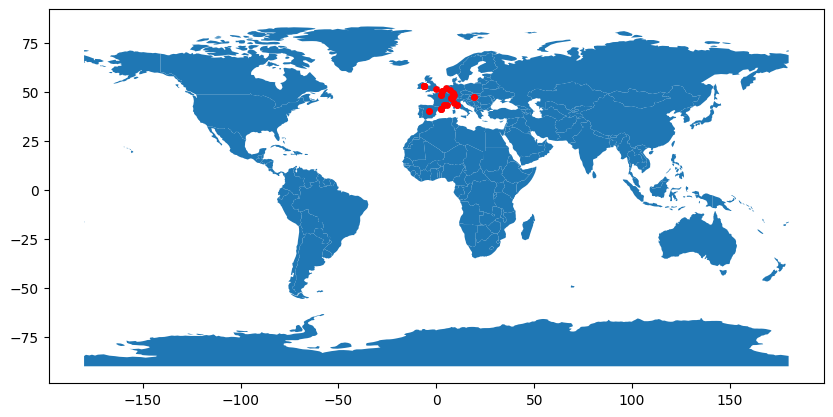

In [164]:
from shapely.geometry import Point
import geopandas as gpd

points = [Point(xy) for xy in zip(data['longitude'], data['latitude'])]
df = data[['longitude', 'latitude']]
gdf = gpd.GeoDataFrame(df, geometry=points)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15)